# Задания для самостоятельного решения

#### 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [14]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)
stats.ttest_ind(A, B)

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

In [25]:
stat, p = mannwhitneyu(A, B)
print(p)
if p < 0.05:
    print('Можем отвергнуть нулевую гипотезу. Различия в эффекте у пациентов нет')
else:
    print('Недостаточно оснований для отклонения H0 о равности двух выборок. Есть различие в эффекте у пациентов')

0.054347680446611354
Недостаточно оснований для отклонения H0 о равности двух выборок. Есть различие в эффекте у пациентов


#### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - те же люди, но без препарата.

B - выборка получающая препарат B

In [18]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)

In [20]:
from scipy.stats import wilcoxon

In [26]:
stat, p = wilcoxon(A, B)
print(p)
if p < 0.05:
    print('Можем отвергнуть нулевую гипотезу. Различия в эффекте у пациентов нет')
else:
    print('Недостаточно оснований для отклонения H0 о равности двух выборок. Есть различие в эффекте у пациентов')

0.04077572901549266
Можем отвергнуть нулевую гипотезу. Различия в эффекте у пациентов нет


#### 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой? 


water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [27]:
from scipy.stats import f_oneway

water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

F, p = f_oneway(water, nutri, mineral)

alpha = 0.05   # Уровень значимости
print(F, p)

if p > alpha:
    print('Same distribution (fail to reject H0). Эффект от минералки есть')
else:
    print('Different distribution (reject H0). Эффекта от минералки нет')

12.525963044834192 2.9240047906326866e-05
Different distribution (reject H0). Эффекта от минералки нет


# Cookie Cats

Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.

Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

# Данные A/B тестирования

In [29]:
data = pd.read_csv('cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

userid - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

In [30]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


**Ваши выводы**

Выборки поделены примерно пополам, а значит можно будет наиболее точно оценить "успешность" установки ворот на 30 или 40 уровне

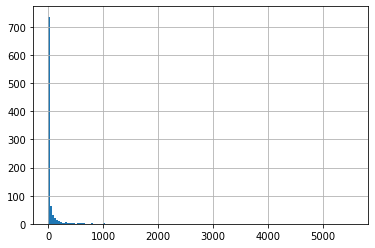

In [40]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=150)  # попробуйте поварировать bins=150

**Ваши выводы**

Практически все игроки бросают играть в игру на первых раундах, дойдя до платных ворот

Text(0.5, 0, '# Game rounds')

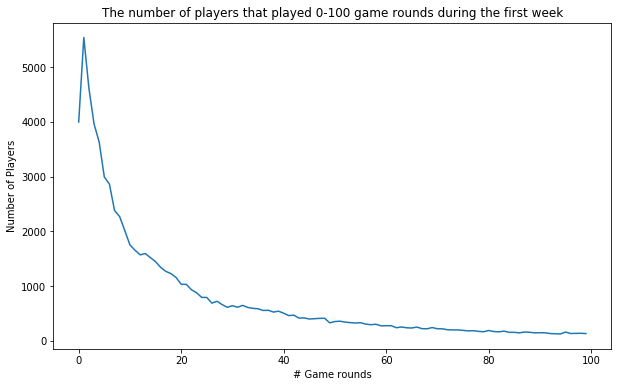

In [41]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')





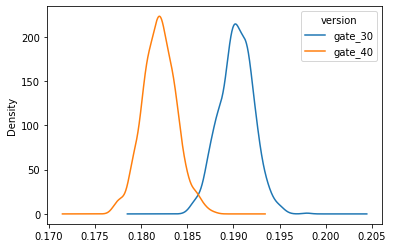

In [42]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

**Ваши выводы?**

Можно сделать вывод, что версия с воротами на 30 уровне имеет большее значение, а значит в нее играют чаще, чем в версию с воротами на 40 уровне

In [49]:
#сравним наши выборки по "наигранности" игры в зависимости от версии ворот
gate_30 = data[data['version']=='gate_30']["sum_gamerounds"]
gate_40 = data[data['version']=='gate_40']["sum_gamerounds"]

In [50]:
F, p = stats.f_oneway(gate_30, gate_40)

alpha = 0.05   # Уровень значимости
print('Statistics=%.3f, p=%.3f' % (F, p))

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.794, p=0.373
Same distribution (fail to reject H0)


Можно отвергнуть гипотезу о том, что игра одинаково устраивает игроков вне зависимости от ворот. А значит можно предположить, что всё же лучше ставить платные ворота после 30ого уровня, а не 40ого